In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

# import from utils.ipynb
import ipynb.fs.full.utils as utils

# 1. Load raw input
## Hardcoded block -- MOST IMPORTANT TO CHECK VLAUES

In [13]:
evaluate_last_X_years = False
X=7
currency_pair = 'CAD=X'
numbers_in_currency = 'CAD'
share_name = 'EMA.TO'

# 1.2. Raw input statement data

In [14]:
route = f"../csv_files/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

## (OPTIONAL) Time Filtering - Last 7 years daat

In [15]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,sell_gen_adm_exp,r&d,other_income,financial_income,profit_before_tax,tax,...,other_investing_cf_items,cash_from_investing,financing_cf_item,total_cash_dividend_paied,issuance_of_stocks,issuance_of_debt,cash_from_financing,foreign_exchange_effect,net_change_in_cash,shares
0,2013-03-31,638,-20,658,0,0,-460,-29,169,-39,...,-113,-177,31,-50,15,111,106,4,25,132
1,2013-06-30,507,-11,496,0,0,-414,-33,49,-6,...,-34,-115,-4,-49,137,-135,-51,5,-20,132
2,2013-09-30,491,-8,484,0,0,-398,-39,46,-7,...,-31,-114,2,-53,15,91,56,-4,140,132
3,2013-12-31,594,-14,581,0,0,-518,-28,34,-3,...,-427,-516,-9,-53,14,298,251,5,-131,132
4,2014-03-31,1050,-10,1041,0,0,-722,-38,280,-67,...,-2,-83,-8,-56,260,-184,12,4,79,143


## Calculate date when quaterly reports could be available

In [16]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [17]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
38,2022-09-30,2022-10-21,266,1835,0,1835,184,526,1225,722,...,0,39804,2071,2514,575,7690,15285,28679,282,-663
39,2022-12-31,2023-02-11,266,2358,0,2358,499,310,1503,769,...,0,39742,2025,2726,574,7287,15744,28315,-42,-892
40,2023-03-31,2023-04-21,266,2433,0,2433,576,280,1156,735,...,0,38817,1304,2833,682,5908,15807,26940,453,-637
41,2023-06-30,2023-07-21,266,1418,0,1418,44,313,1032,826,...,0,38472,1283,2852,96,5267,16441,26887,498,-714
42,2023-09-30,2023-10-21,266,1740,0,1740,118,254,1111,840,...,0,39147,1424,2666,676,5873,16243,27377,867,-712


## Pull historical average USD national currency rates and add to the dataframe

In [18]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
38,2022-09-30,2022-10-21,266,1835,0,1835,184,526,1225,722,...,39804,2071,2514,575,7690,15285,28679,282,-663,1.304159
39,2022-12-31,2023-02-11,266,2358,0,2358,499,310,1503,769,...,39742,2025,2726,574,7287,15744,28315,-42,-892,1.357405
40,2023-03-31,2023-04-21,266,2433,0,2433,576,280,1156,735,...,38817,1304,2833,682,5908,15807,26940,453,-637,1.352063
41,2023-06-30,2023-07-21,266,1418,0,1418,44,313,1032,826,...,38472,1283,2852,96,5267,16441,26887,498,-714,1.343352
42,2023-09-30,2023-10-21,266,1740,0,1740,118,254,1111,840,...,39147,1424,2666,676,5873,16243,27377,867,-712,1.341033


## Convert USD values related to IS, BS, CFS to national currency

In [19]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
38,2022-09-30,2022-10-21,266,1835,0,1835,184,526,1225,722,...,39804,2071,2514,575,7690,15285,28679,282,-663,1.304159
39,2022-12-31,2023-02-11,266,2358,0,2358,499,310,1503,769,...,39742,2025,2726,574,7287,15744,28315,-42,-892,1.357405
40,2023-03-31,2023-04-21,266,2433,0,2433,576,280,1156,735,...,38817,1304,2833,682,5908,15807,26940,453,-637,1.352063
41,2023-06-30,2023-07-21,266,1418,0,1418,44,313,1032,826,...,38472,1283,2852,96,5267,16441,26887,498,-714,1.343352
42,2023-09-30,2023-10-21,266,1740,0,1740,118,254,1111,840,...,39147,1424,2666,676,5873,16243,27377,867,-712,1.341033


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [20]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [21]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

In [22]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [23]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2013-04-22,22.252911,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,56.0,...,0.276927,0.723073,5.165992,0.263158,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631
1,2013-04-29,22.168459,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,56.0,...,0.276927,0.723073,5.165992,0.263158,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631
2,2013-05-06,22.204193,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,56.0,...,0.276927,0.723073,5.165992,0.263158,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631
3,2013-05-13,22.319893,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,56.0,...,0.276927,0.723073,5.165992,0.263158,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631
4,2013-05-20,22.045853,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,56.0,...,0.276927,0.723073,5.165992,0.263158,45.571429,0.487805,1.031348,0.203762,0.06636,0.239631


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [24]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2013-04-22,22.252911,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,56.0,...,0.487805,1.031348,0.203762,0.06636,0.239631,5.648816,1.353633,1.151013,3.349288,4.707346
1,2013-04-29,22.168459,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,56.0,...,0.487805,1.031348,0.203762,0.06636,0.239631,5.627378,1.348496,1.146644,3.344920,4.689482
2,2013-05-06,22.204193,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,56.0,...,0.487805,1.031348,0.203762,0.06636,0.239631,5.636449,1.350670,1.148493,3.346769,4.697041
3,2013-05-13,22.319893,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,56.0,...,0.487805,1.031348,0.203762,0.06636,0.239631,5.665819,1.357708,1.154477,3.352753,4.721516
4,2013-05-20,22.045853,2013-03-31,638.0,3.939394,16.439394,132.0,624.0,4.727273,56.0,...,0.487805,1.031348,0.203762,0.06636,0.239631,5.596255,1.341038,1.140303,3.338579,4.663546


# Calculate Dividend yield and currency-share price correlation

In [25]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

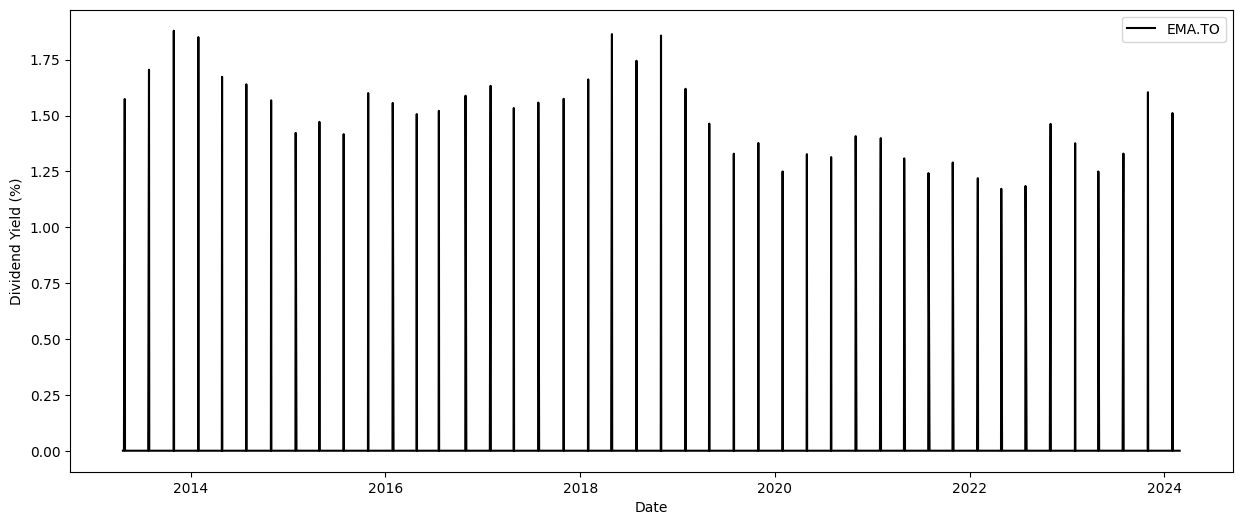

In [26]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate    0.602135
share_price      1.000000
Name: share_price, dtype: float64


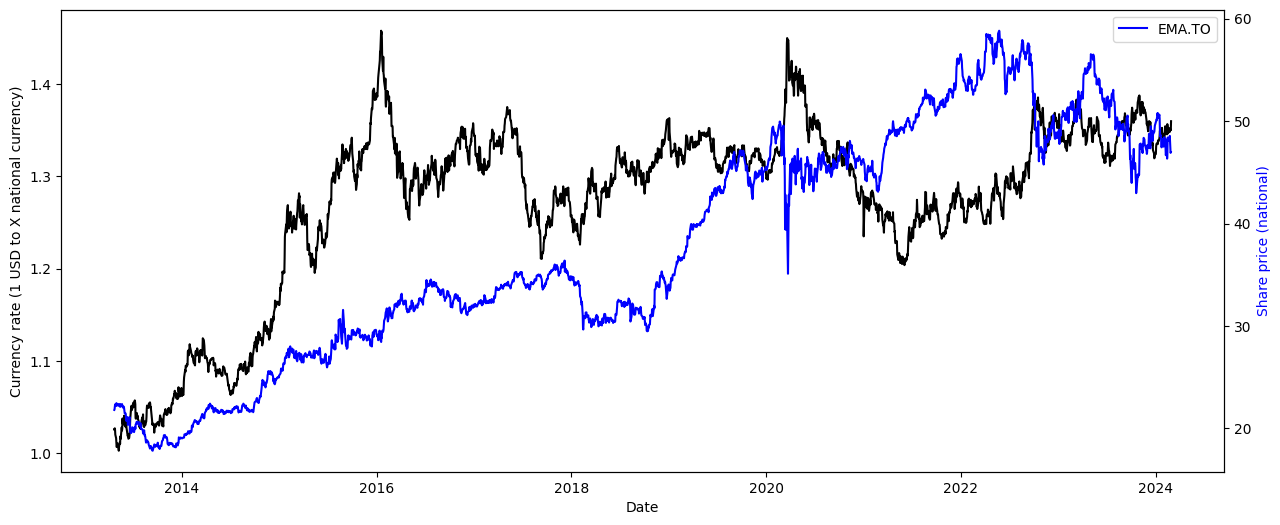

In [27]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

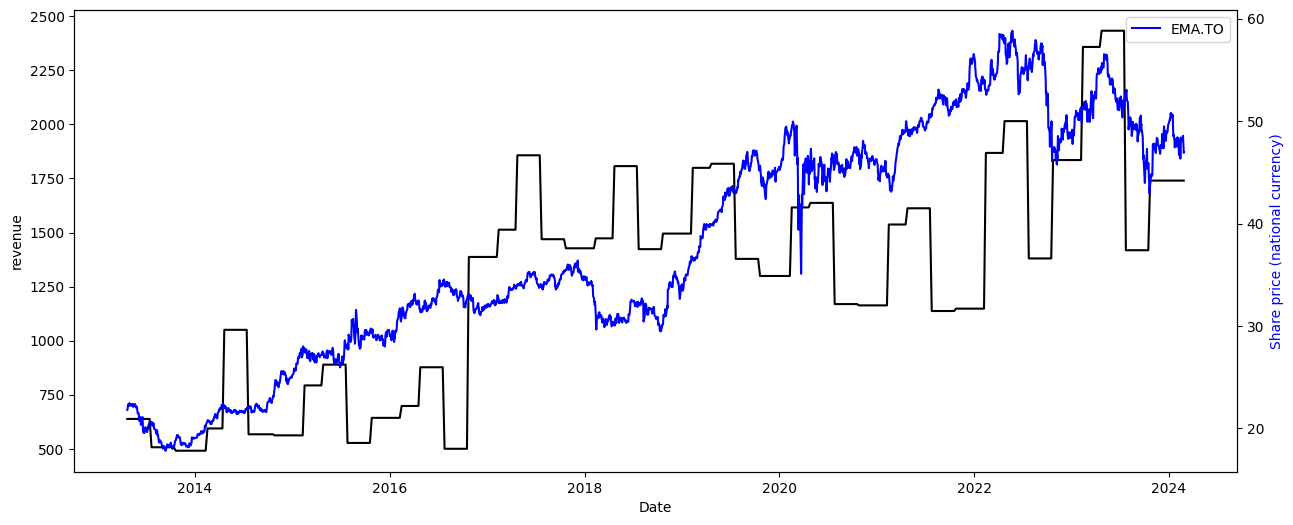

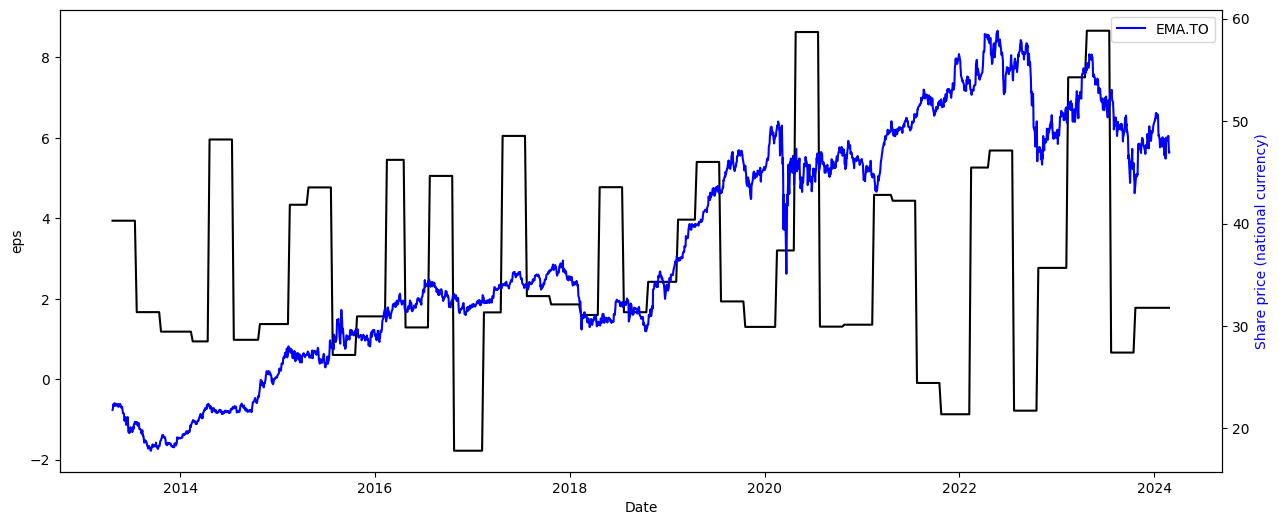

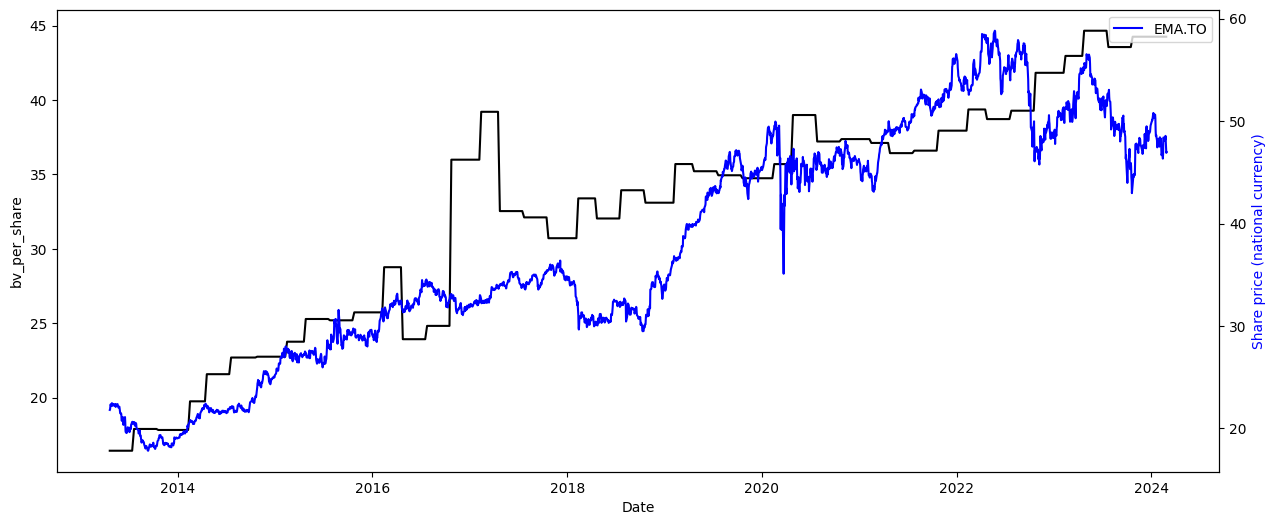

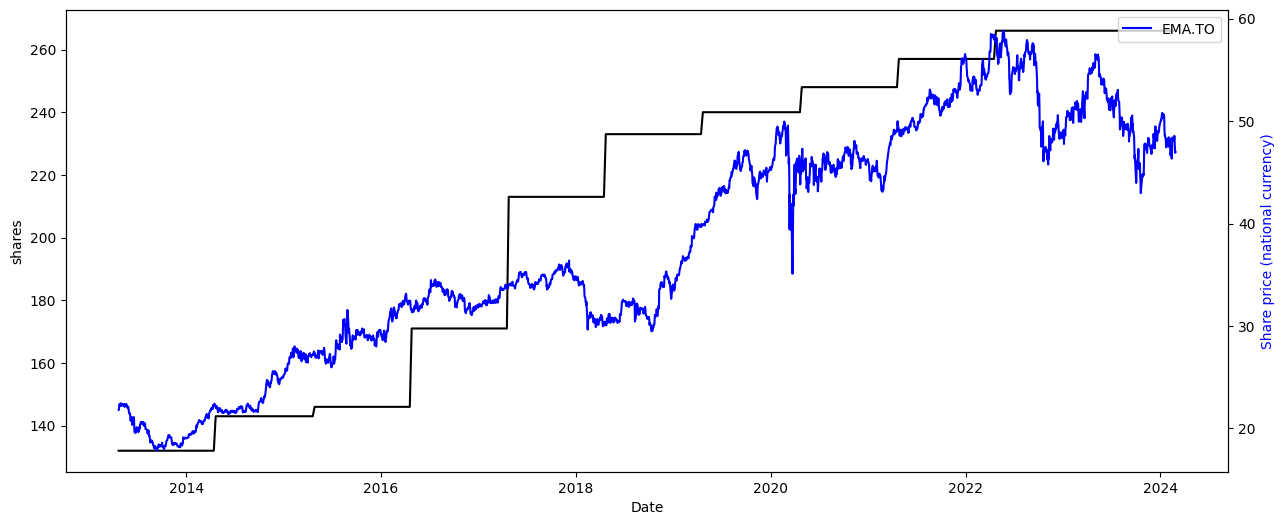

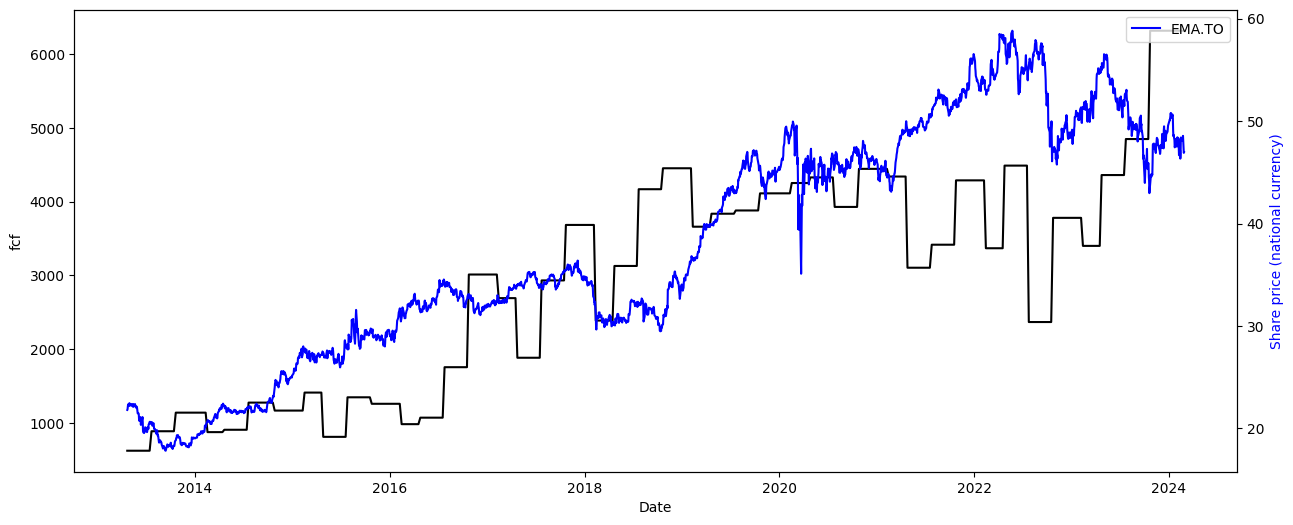

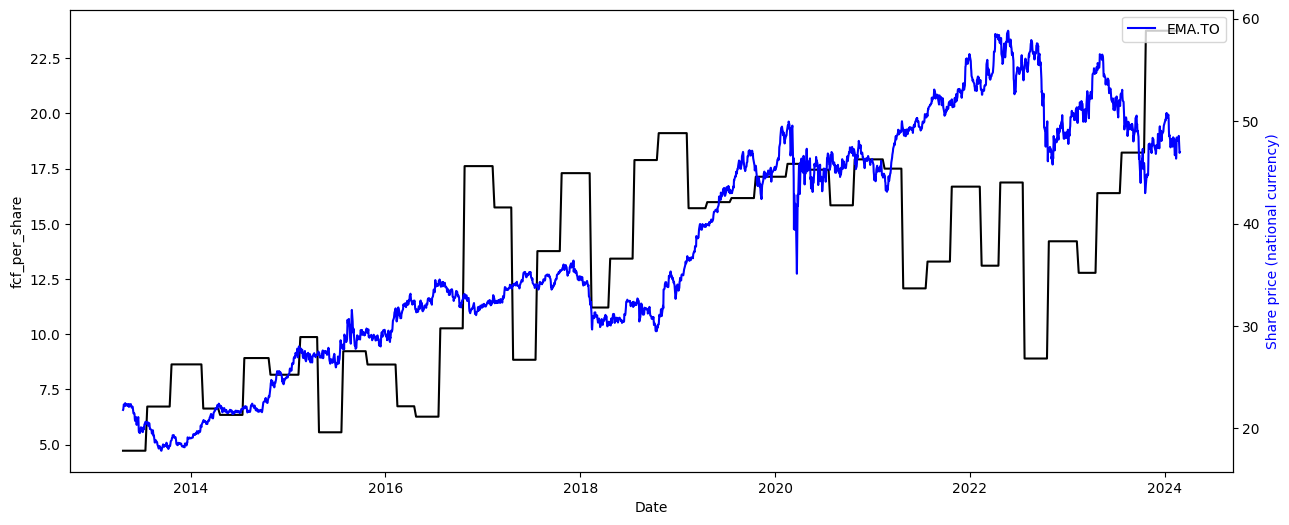

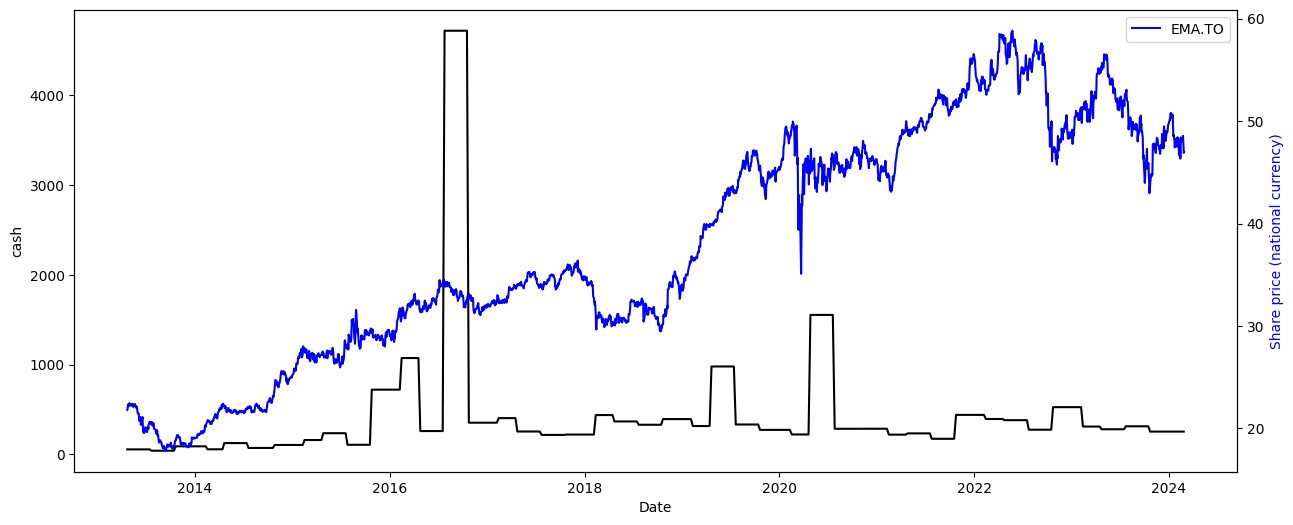

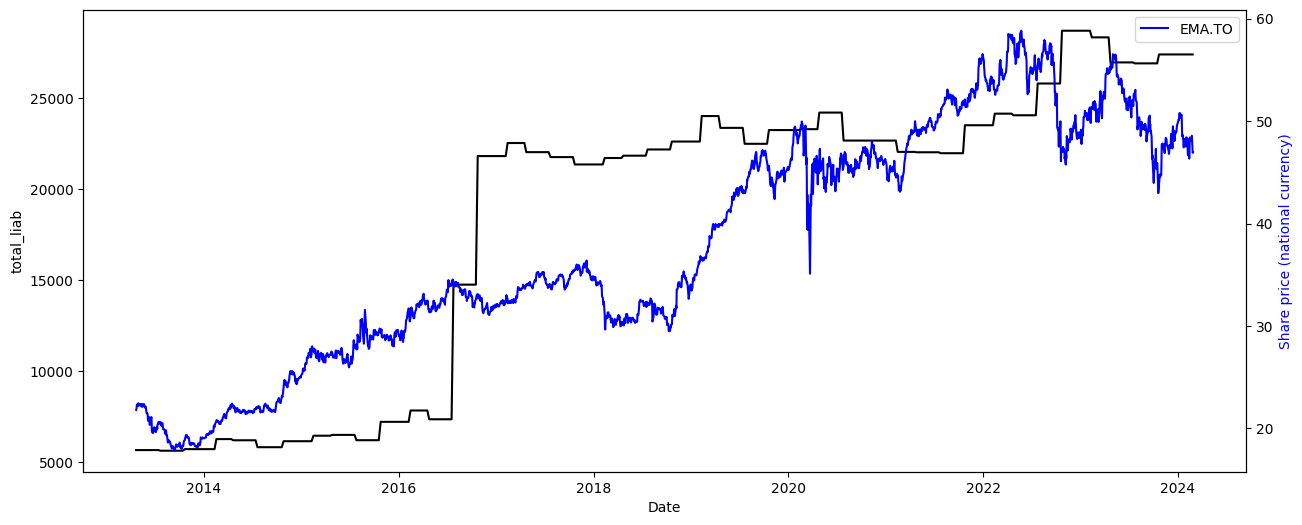

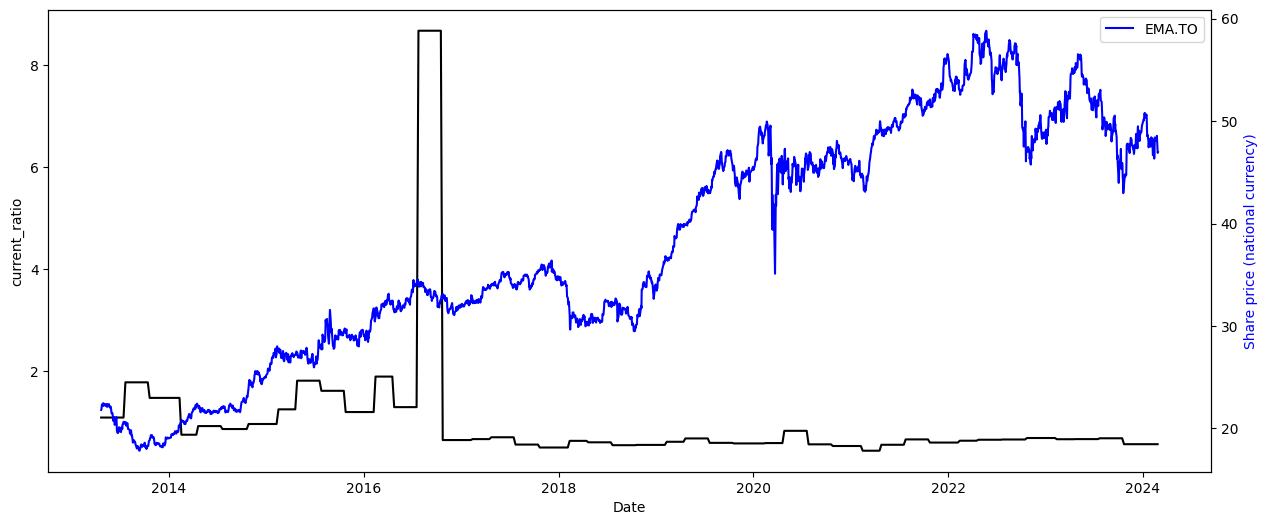

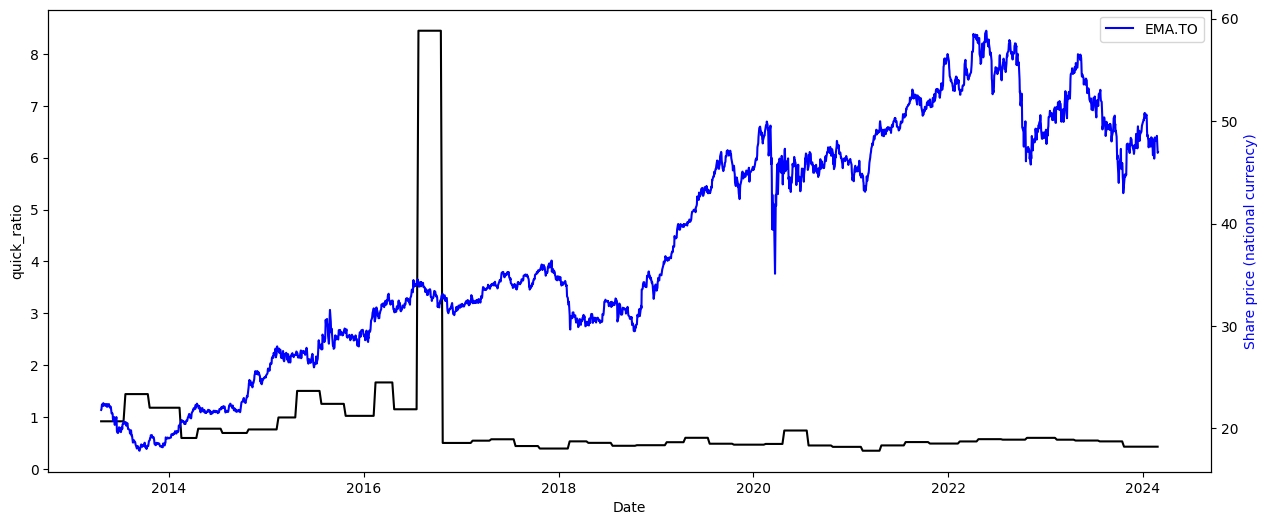

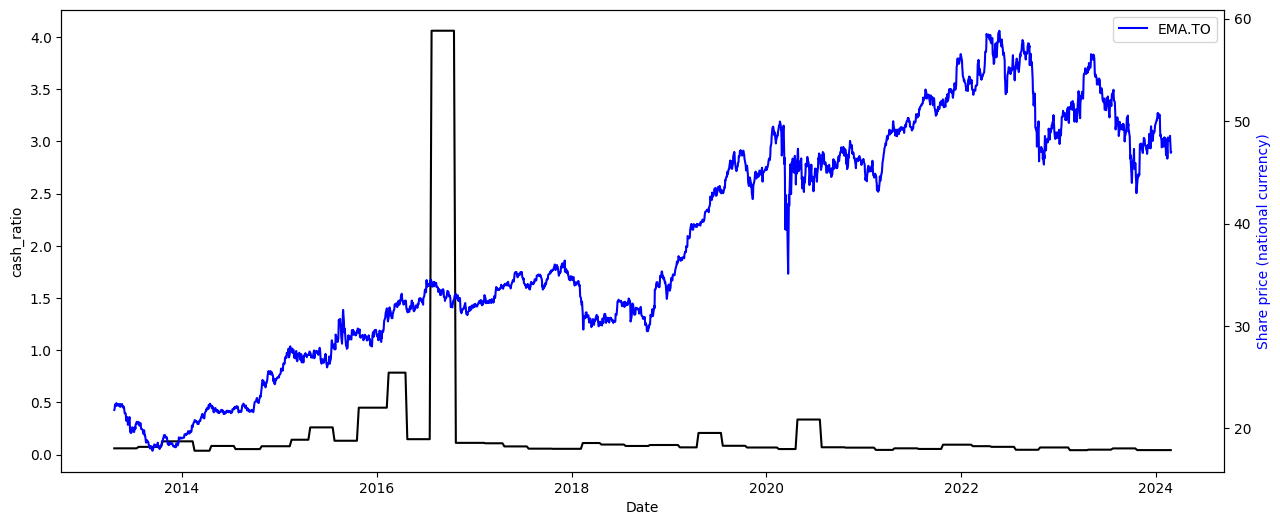

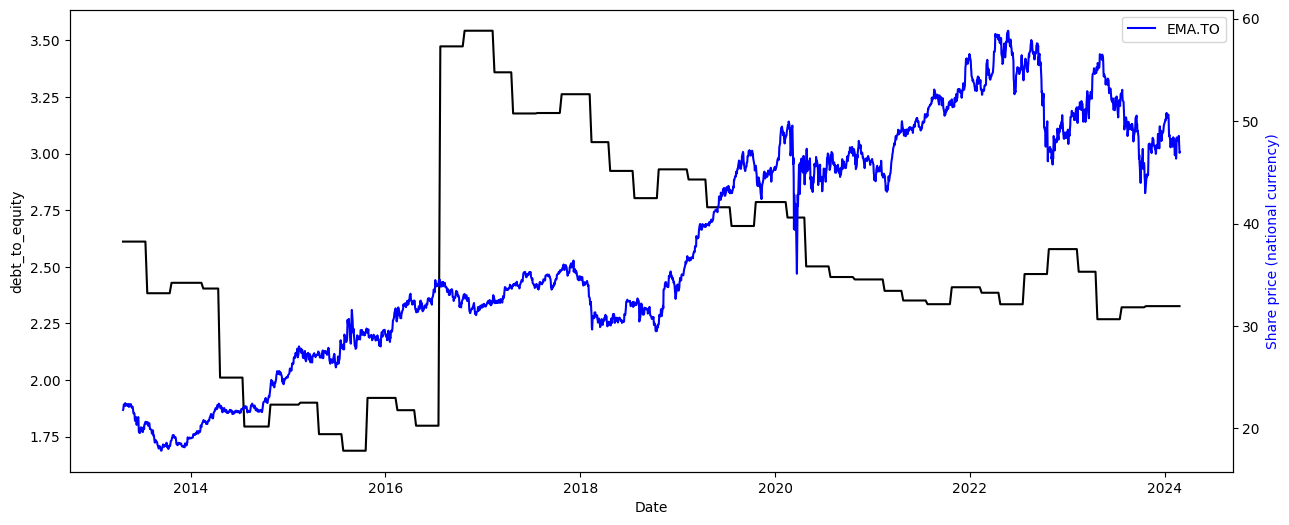

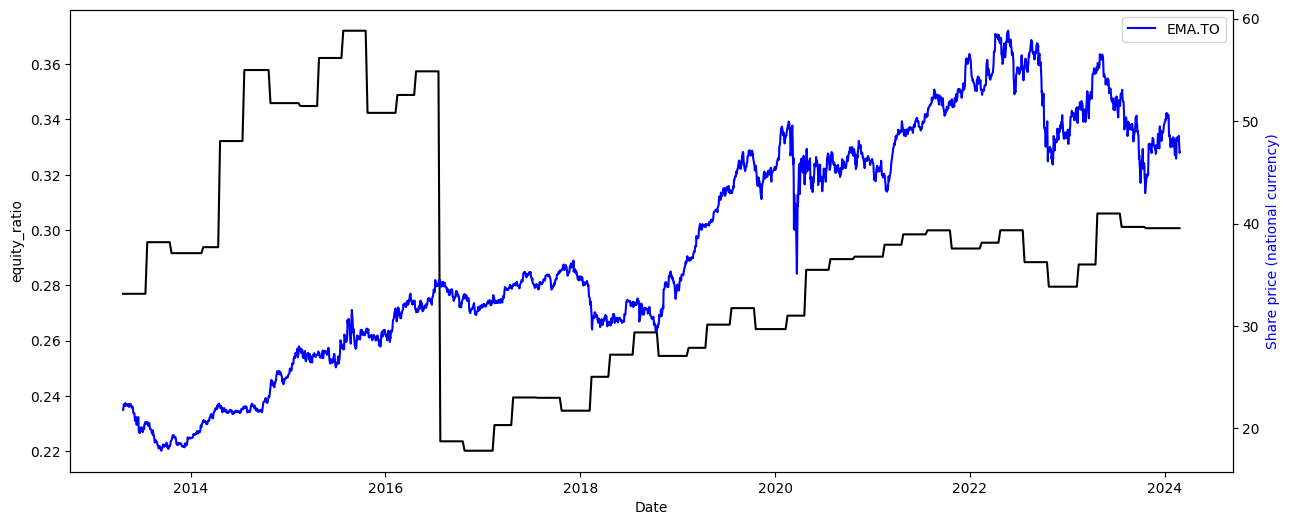

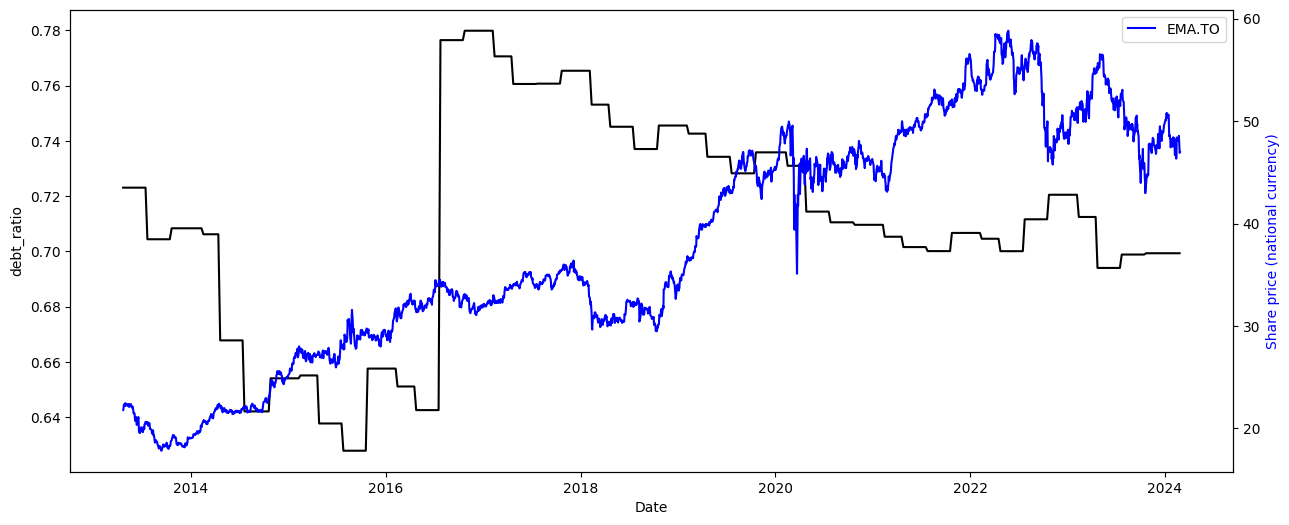

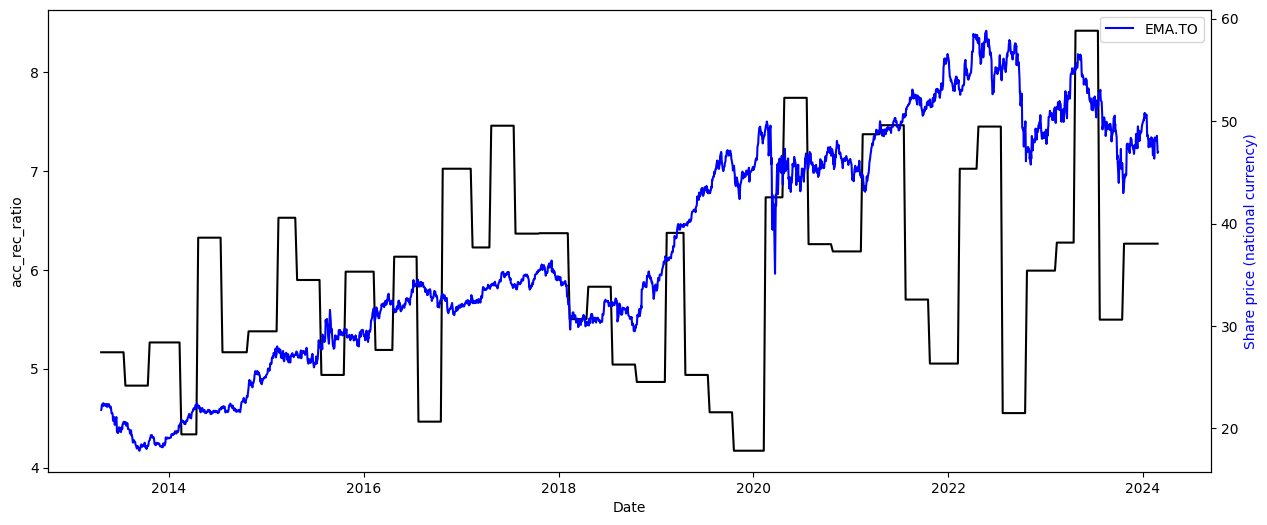

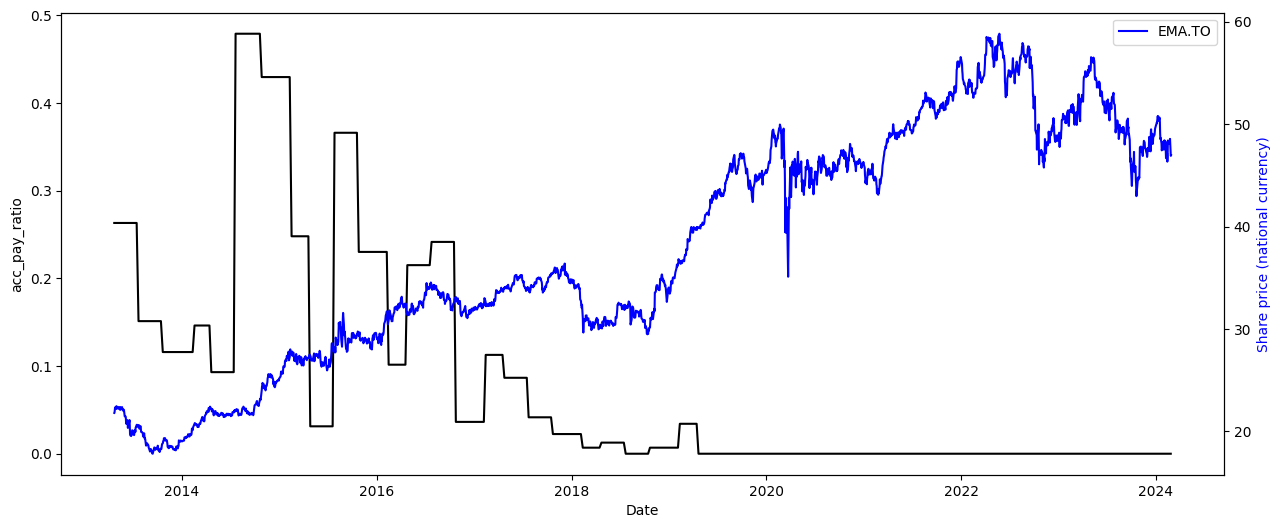

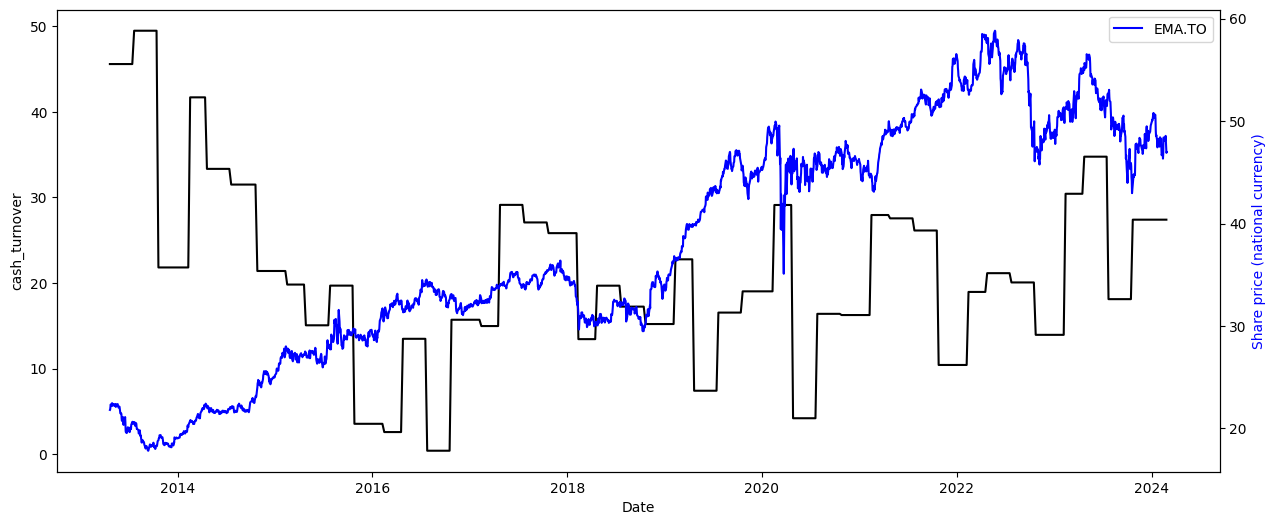

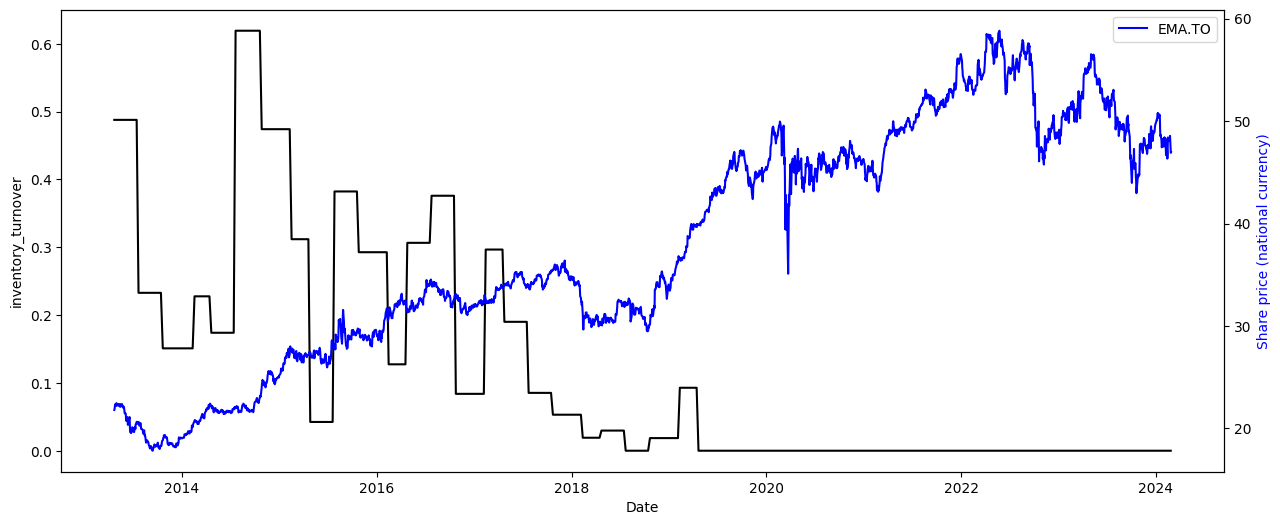

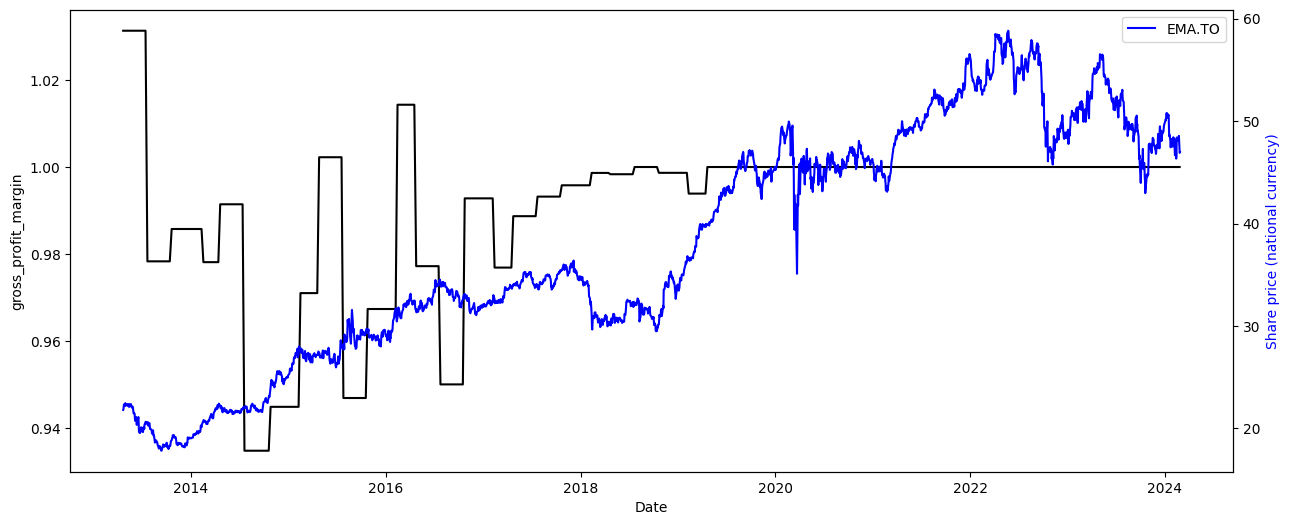

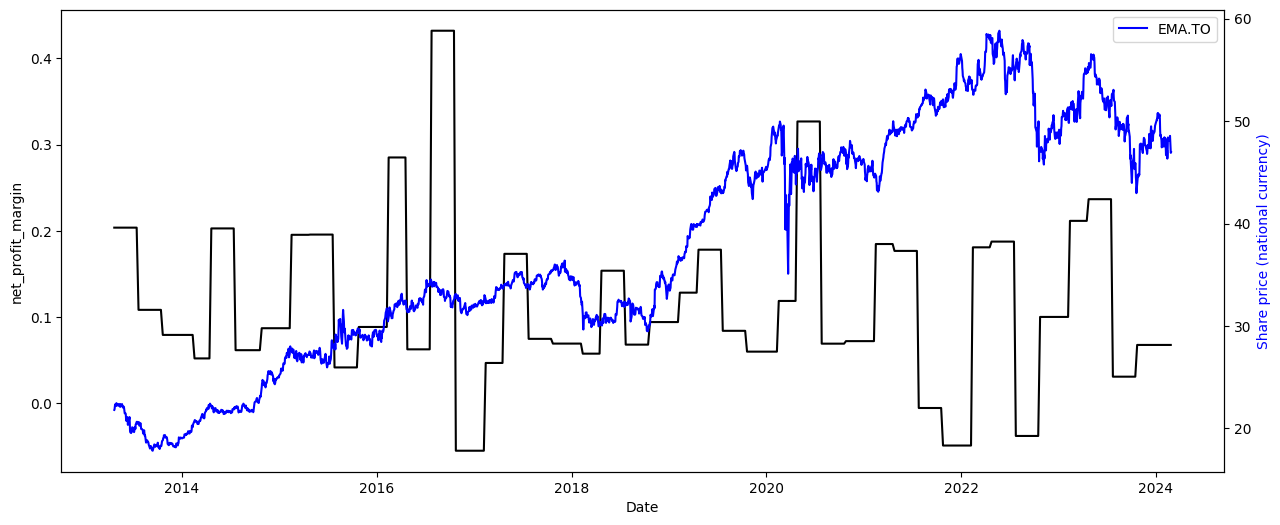

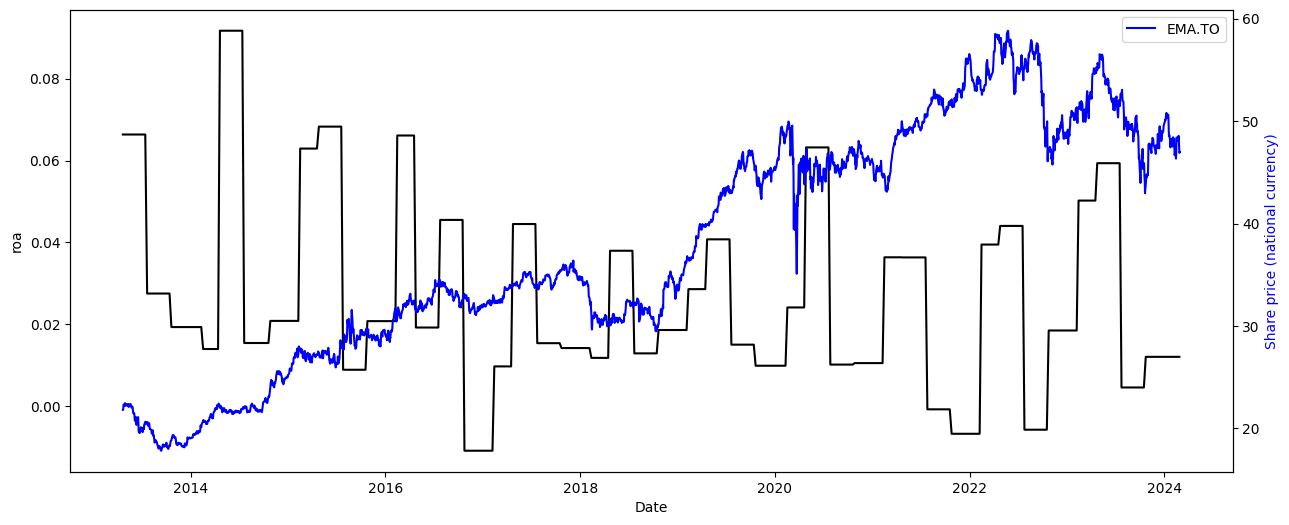

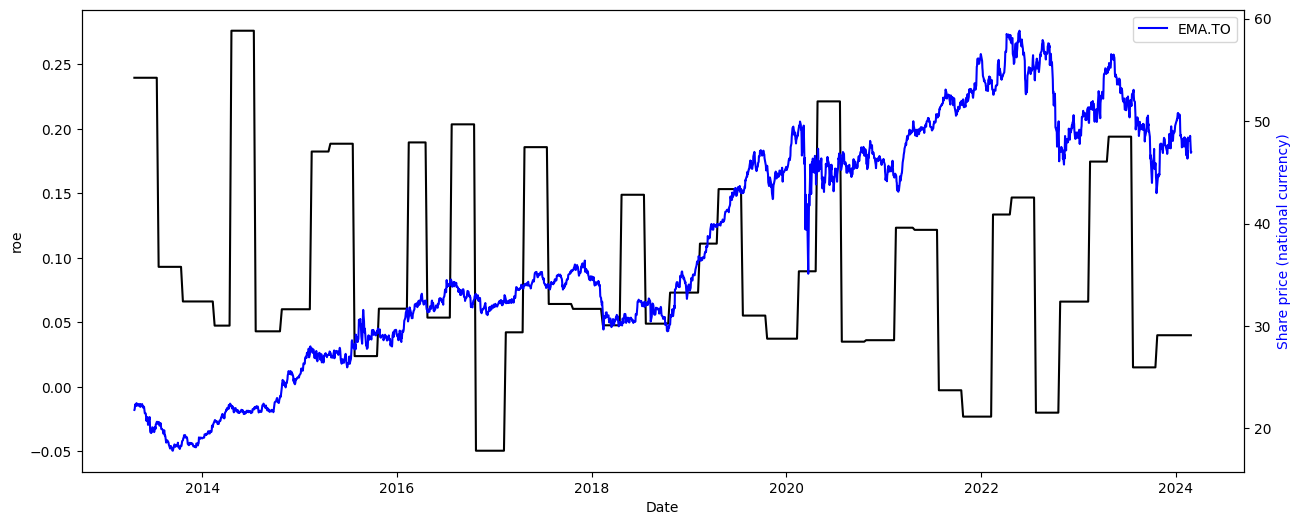

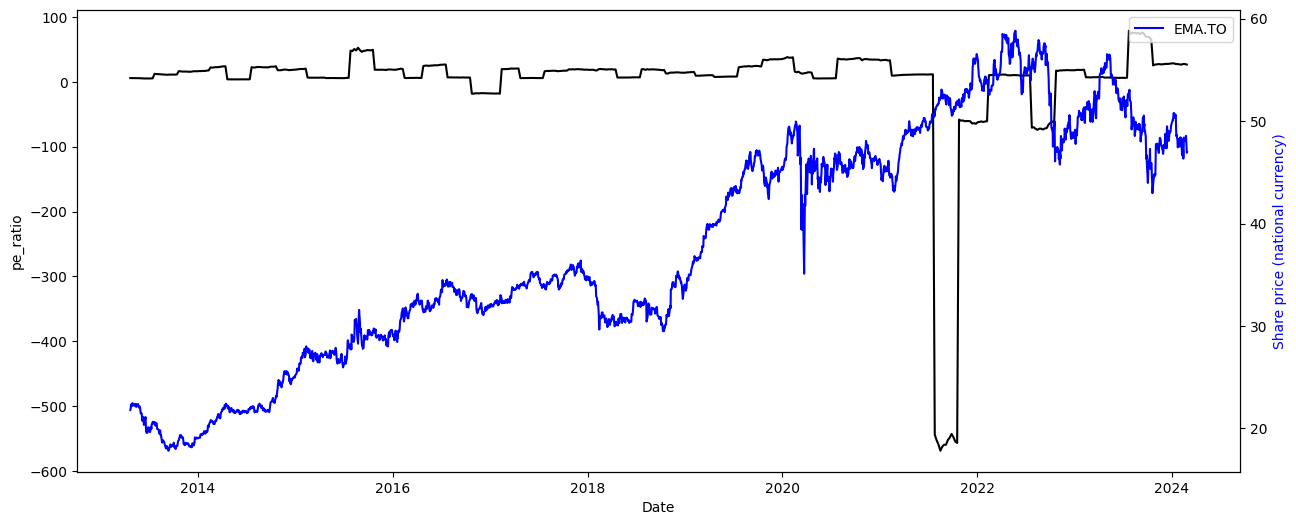

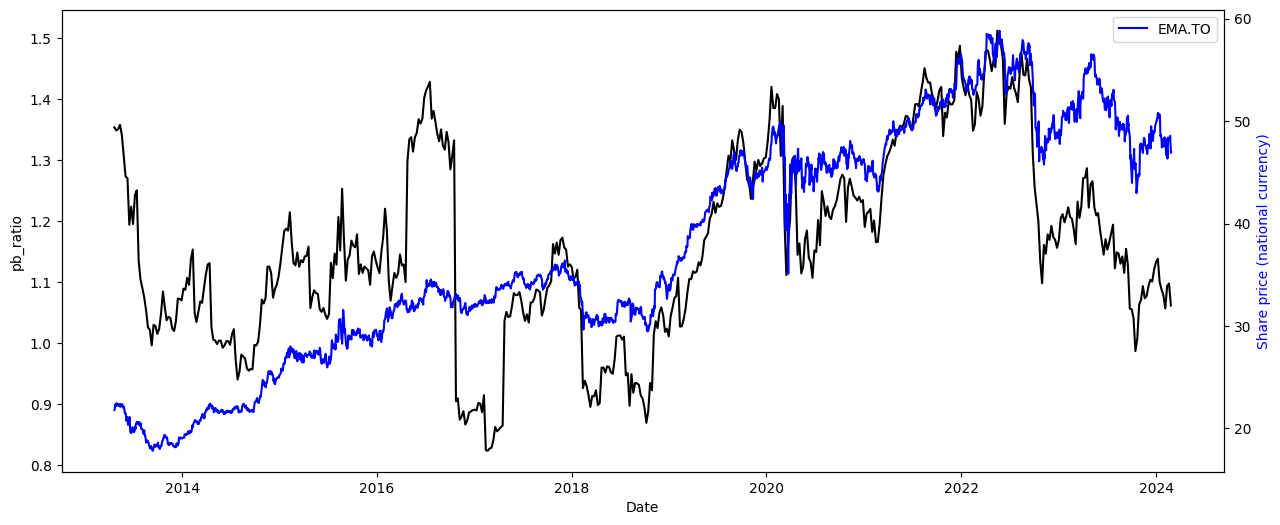

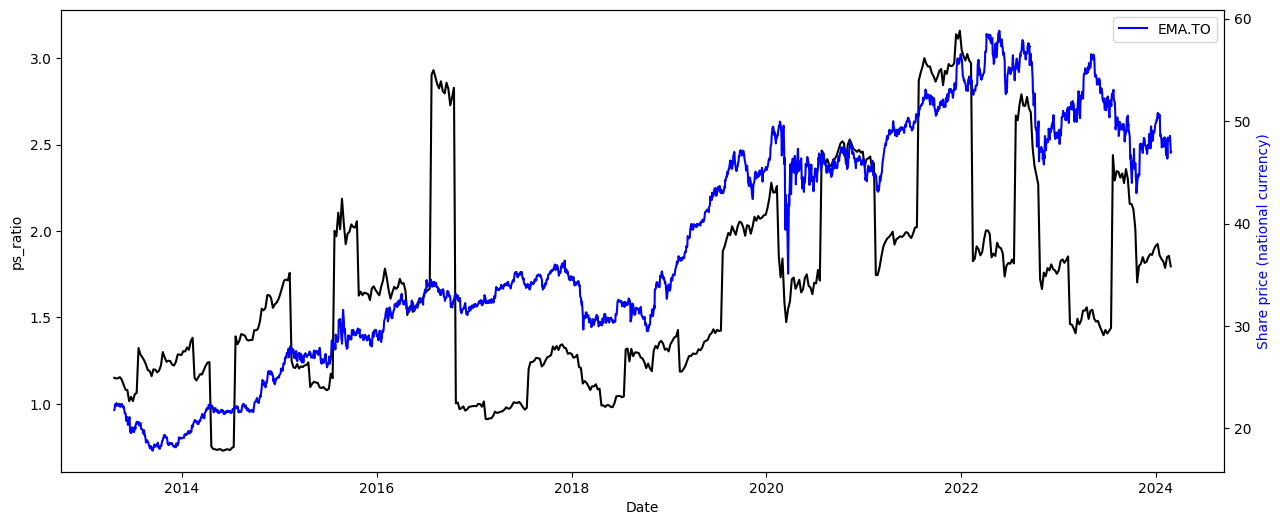

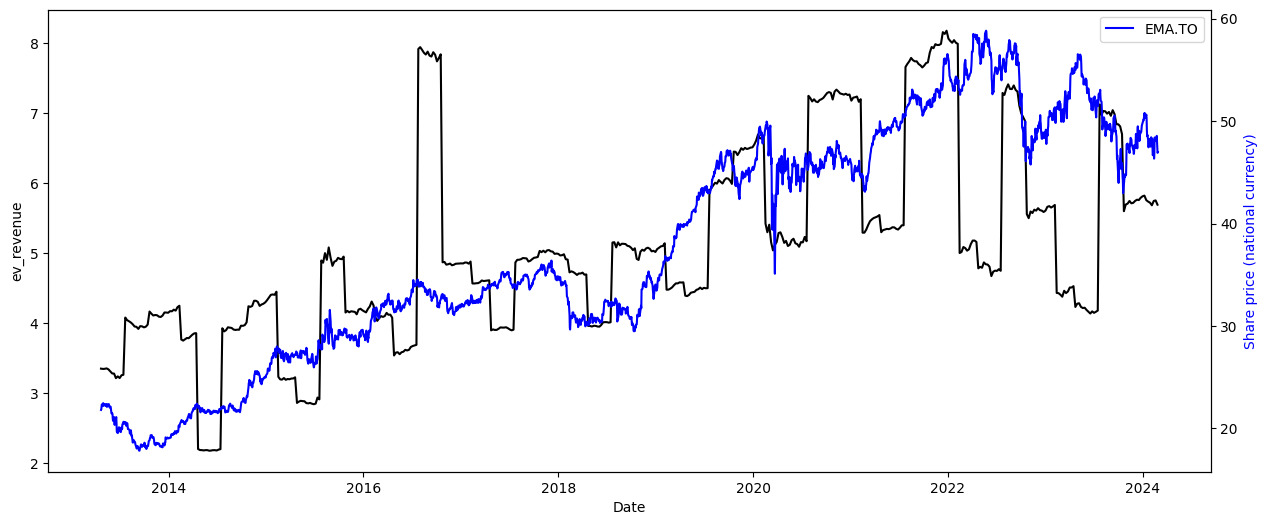

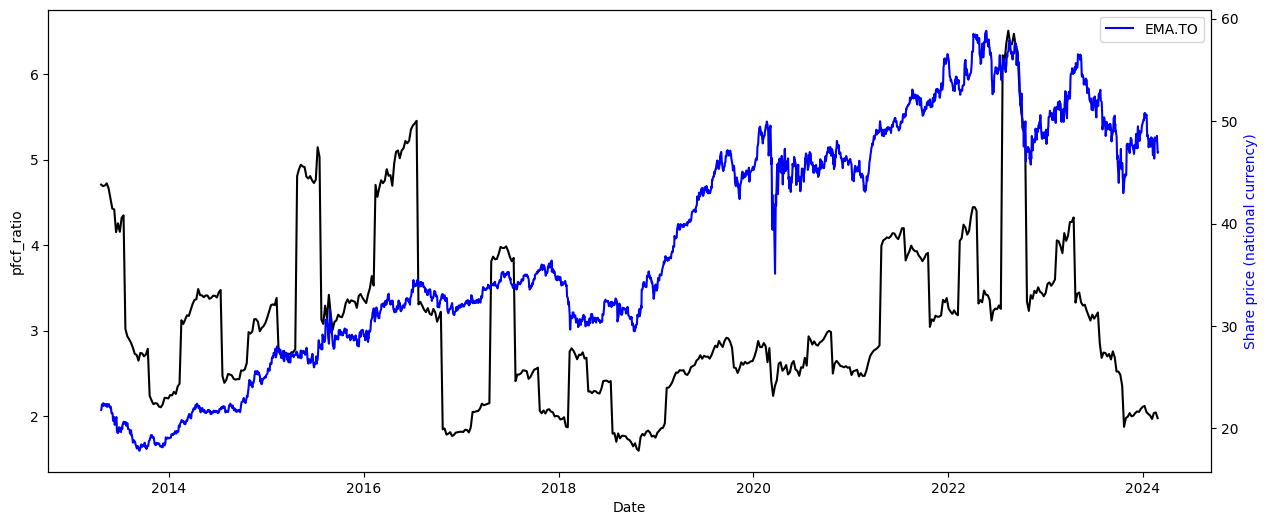

In [28]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

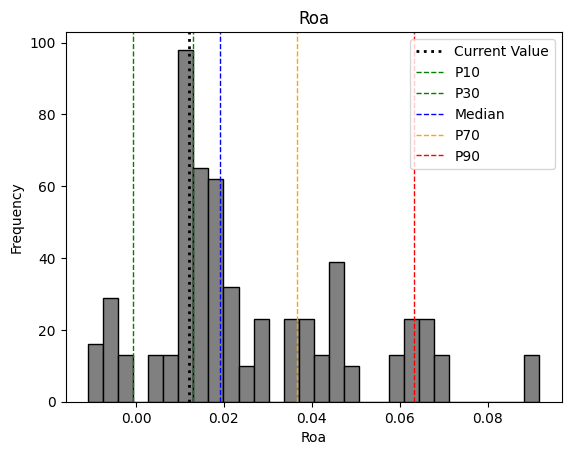

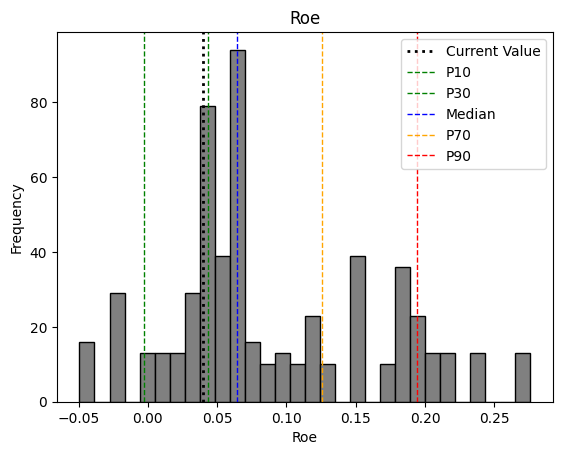

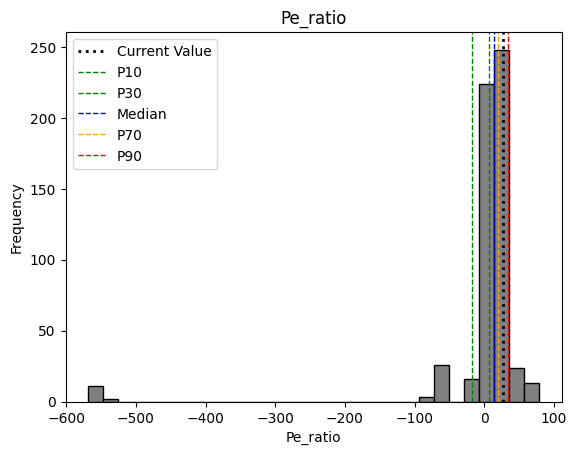

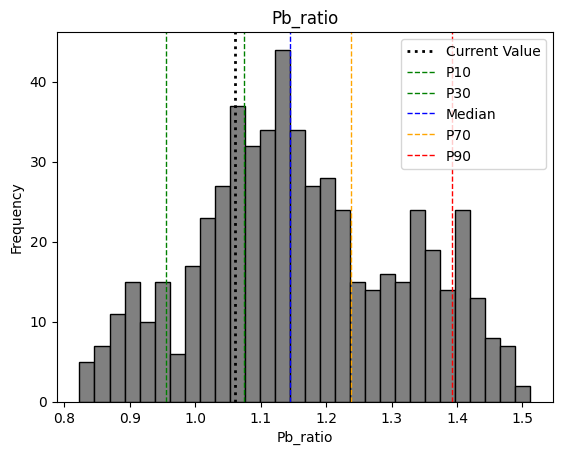

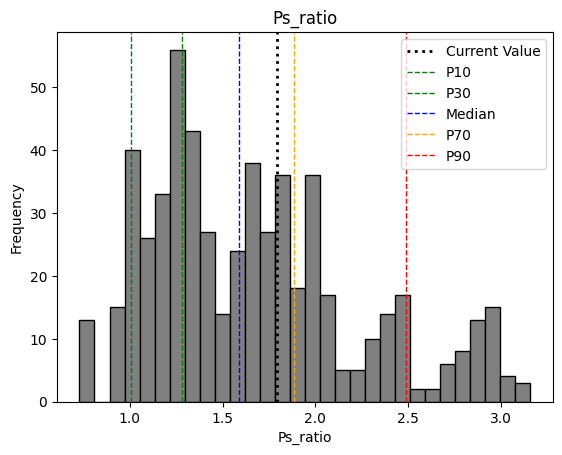

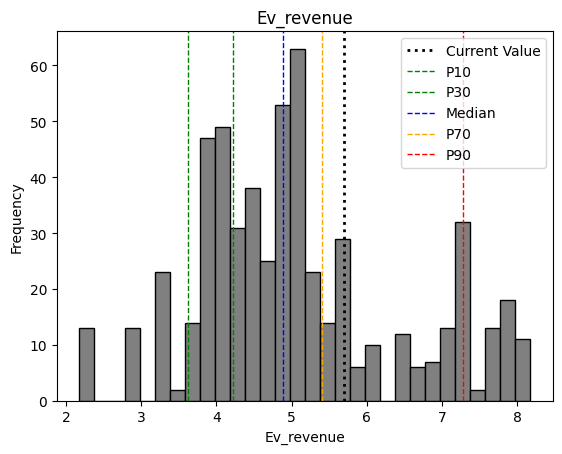

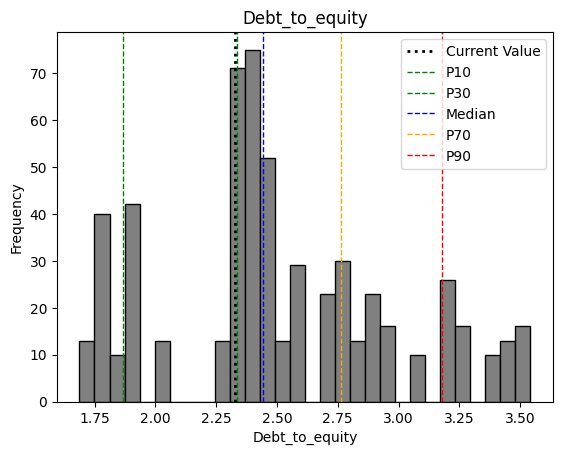

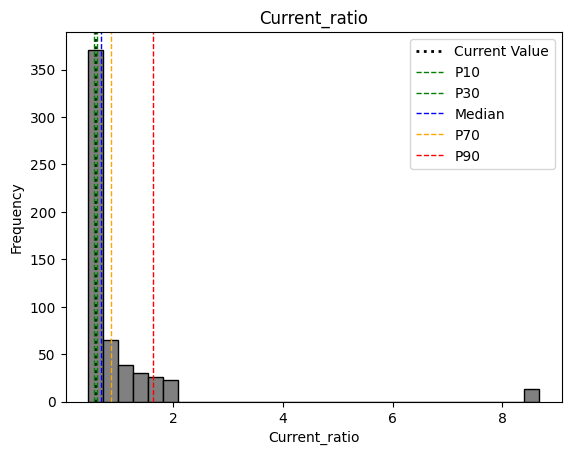

In [29]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[])

## Calculate correlation between value parameters

In [30]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.978995,0.173929,-0.004794,-0.402756,-0.601491,-0.242554,0.224474
roe,0.978995,1.000000,0.180159,0.016524,-0.378695,-0.534472,-0.100438,0.291969
pe_ratio,0.173929,0.180159,1.000000,-0.290500,-0.359292,-0.310516,0.018041,0.036370
pb_ratio,-0.004794,0.016524,-0.290500,1.000000,0.732749,0.491892,-0.216058,0.123855
ps_ratio,-0.402756,-0.378695,-0.359292,0.732749,1.000000,0.890287,-0.141160,0.234721
ev_revenue,-0.601491,-0.534472,-0.310516,0.491892,0.890287,1.000000,0.256987,0.147987
debt_to_equity,-0.242554,-0.100438,0.018041,-0.216058,-0.141160,0.256987,1.000000,0.128910
current_ratio,0.224474,0.291969,0.036370,0.123855,0.234721,0.147987,0.128910,1.000000


36 timestemos have been found!


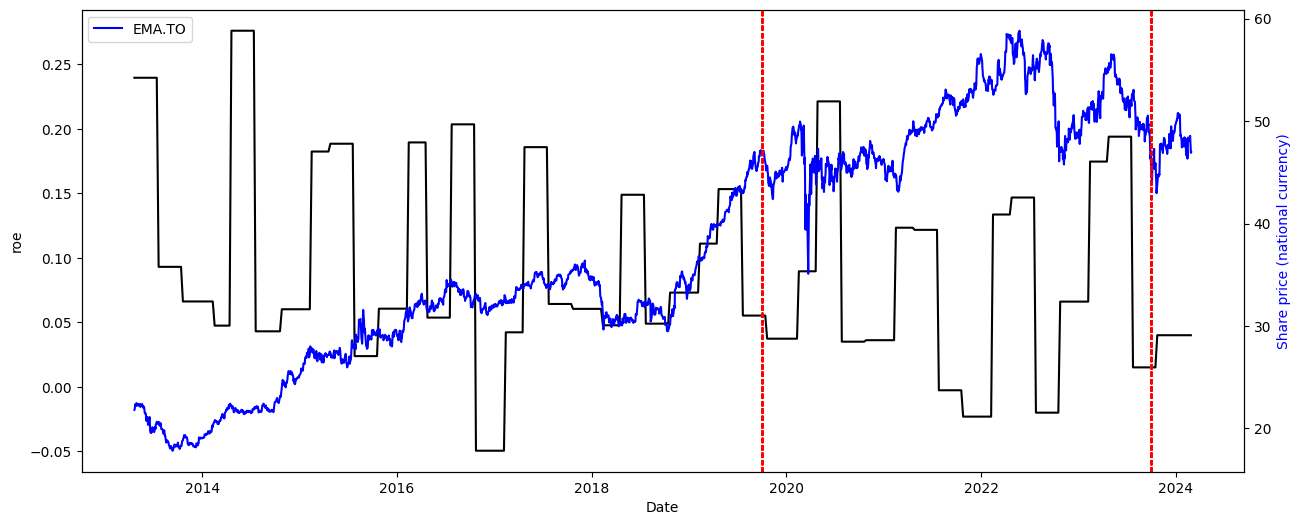

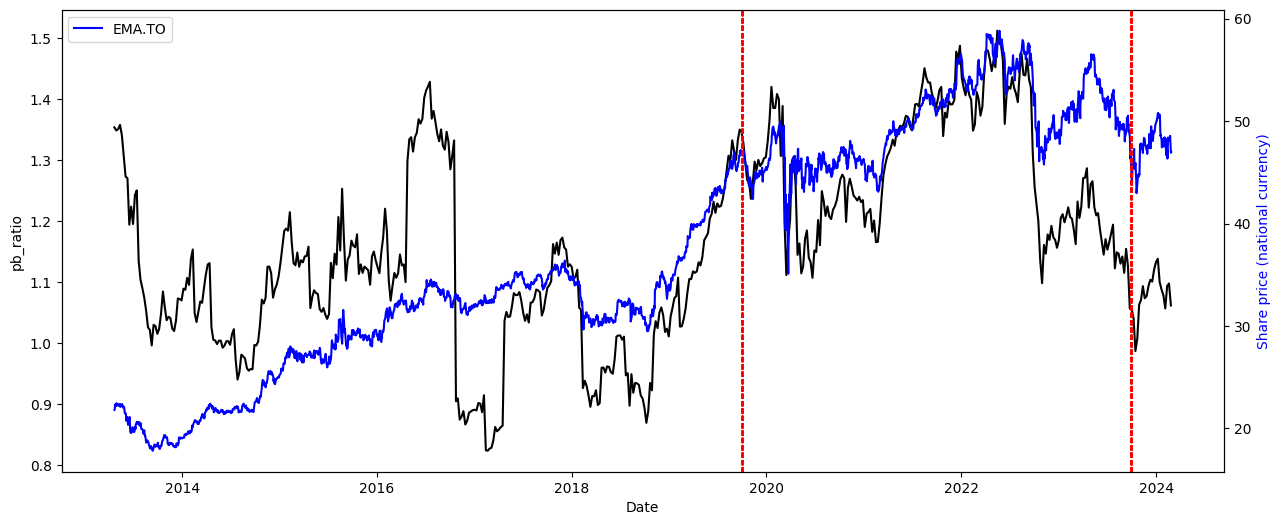

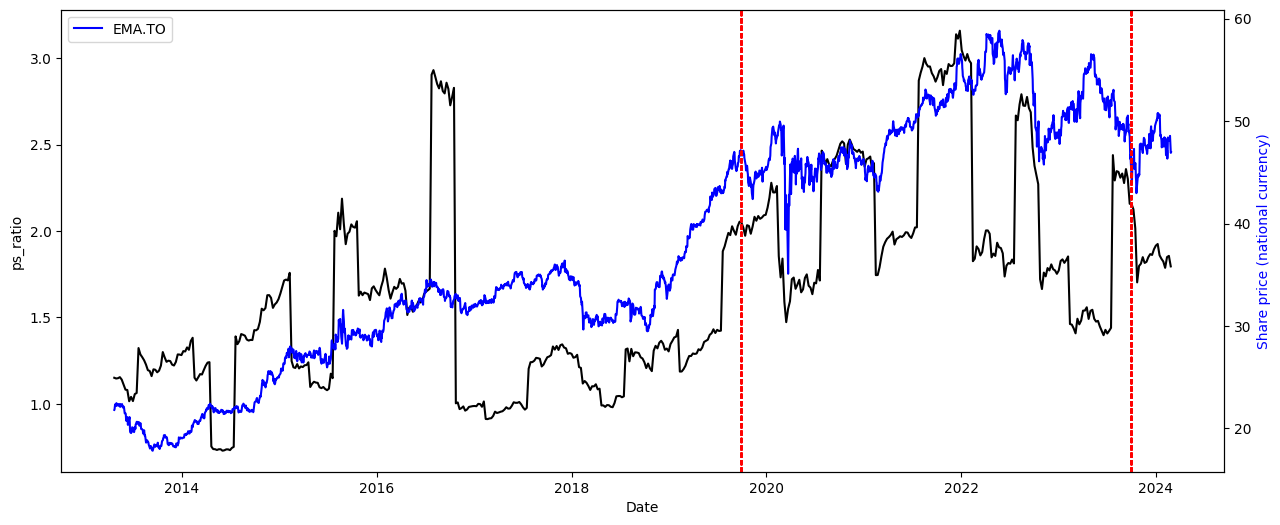

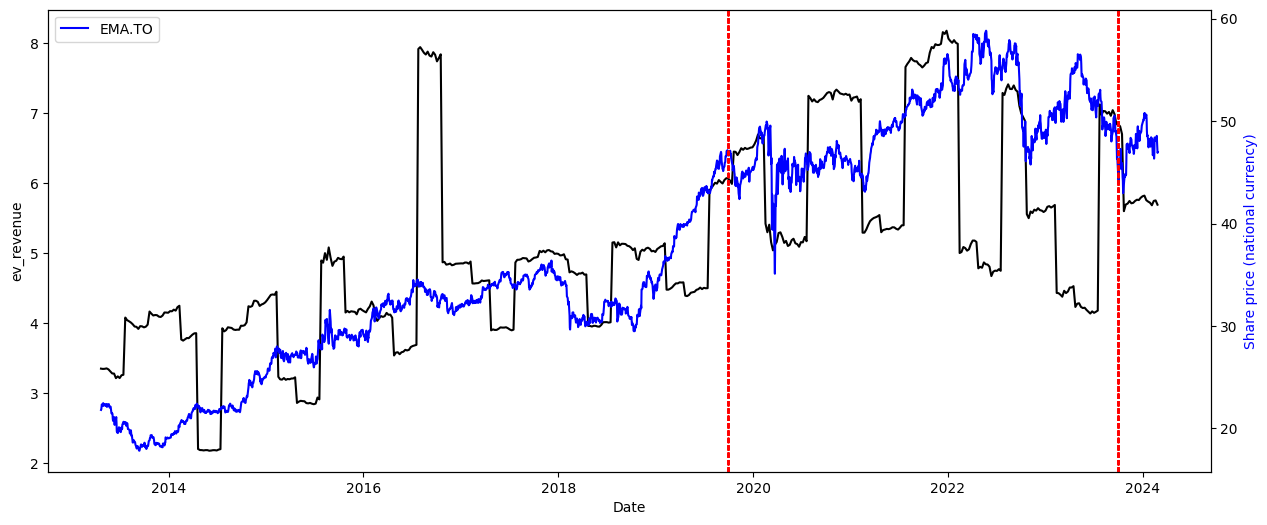

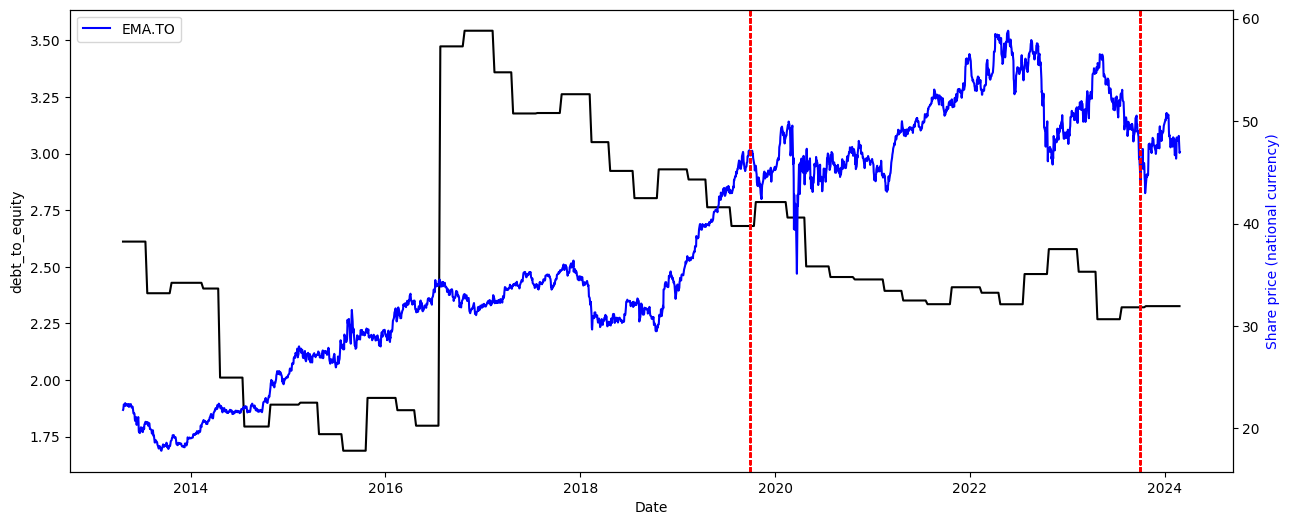

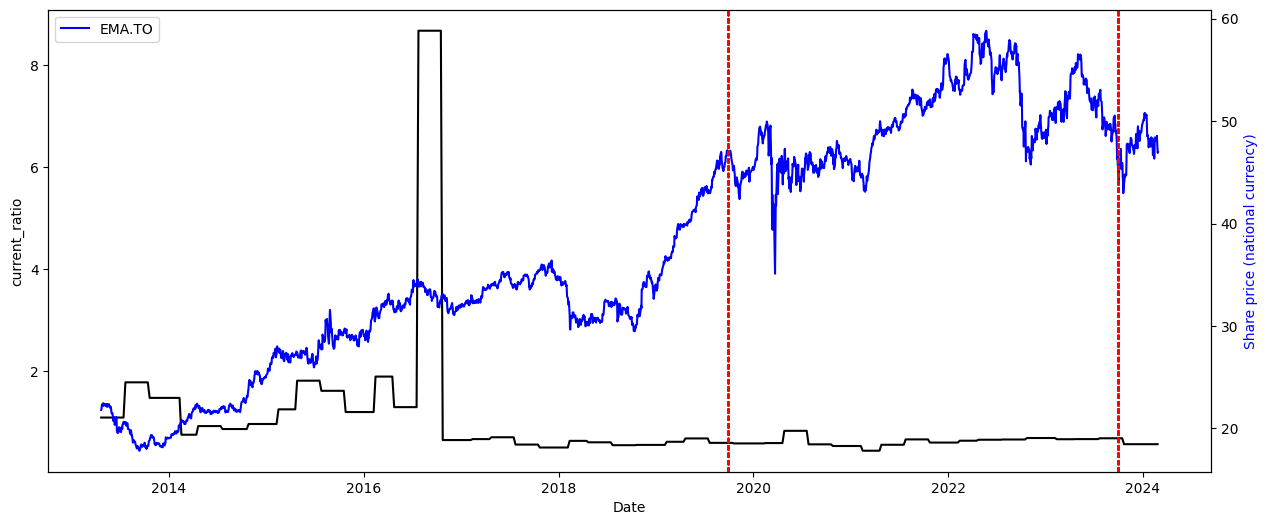

In [31]:
# plot value parameters in time and identify similar events
utils.get_historical_analouges(
    input_df=merged_nat_curr,
    ticker_all_price=ticker_all_price,
    share_name=share_name,
    tolerance=0.2
    )